In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [31]:
data = np.load("labels_ann_1k.npy")
data.shape

(1000, 7)

In [32]:
FROGS = np.load("FROG_1k.npy")
FROGS.shape

(1000, 128, 128)

In [33]:
FROGS = FROGS.reshape(1000,-1)

In [34]:
a_max = np.max(FROGS)
b_min = np.min(FROGS)
X_orig = (FROGS - b_min)/(a_max - b_min)
X_train = X_orig[:900, :]
X_val = X_orig[900:, :]

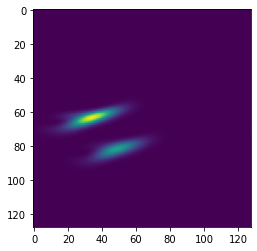

In [35]:
plt.imshow(FROGS[100].reshape(128,128))

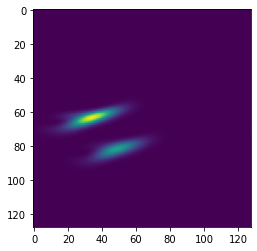

In [36]:
plt.imshow(X_orig[100].reshape(128,128))

In [9]:
#Y = data[:, 0:2]
#y_min = np.min(Y)
#y_max = np.max(Y)
#Y = (Y - y_min)/(y_max - y_min)
#Y.shape

(400, 2)

In [38]:
Y = np.zeros([1000,7])
Y[:,0] = (data[:,0] - 295)/(695-295)
Y[:,1] = (data[:,1] - 300)/(1000-300)
Y[:,2] = (data[:,2] - 0.6)/(1.5-0.6)
Y[:,3] = (data[:,3] - 0.6)/(1.5-0.6)
Y[:,4] = (data[:,4] + 0.005)/(0.005 + 0.005)
Y[:,5] = (data[:,5] + 0.0005)/(0.0005 + 0.0005)
Y[:,6] = (data[:,6] + 1000)/(5000+1000)

In [43]:
Y_train = Y[:900]
Y_val = Y[900:]

In [44]:
from keras.models import Sequential
from keras.layers import Dense

def create_model():
    model = Sequential()
    model.add(Dense(512, activation = "sigmoid"))
    model.add(Dense(128, activation = "sigmoid"))
    model.add(Dense(7, activation = "sigmoid"))
    return model

In [45]:
model = create_model()
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy", "mean_absolute_error"])

In [52]:
sol = model.fit(X_train, Y_train, epochs = 1000, validation_data=(X_val, Y_val), batch_size = 64)

Train on 900 samples, validate on 100 samples
Epoch 1/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0184 - accuracy: 0.6522 - mean_absolute_error: 0.0844 - val_loss: 0.0472 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1482
Epoch 2/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0180 - accuracy: 0.6633 - mean_absolute_error: 0.0829 - val_loss: 0.0472 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1487
Epoch 3/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0184 - accuracy: 0.6633 - mean_absolute_error: 0.0852 - val_loss: 0.0471 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1482
Epoch 4/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0189 - accuracy: 0.6489 - mean_absolute_error: 0.0866 - val_loss: 0.0486 - val_accuracy: 0.5200 - val_mean_absolute_error: 0.1508
Epoch 5/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0178 - accuracy: 0.6511 - mean_absolute_erro

900/900 [==============================] - 3s 3ms/step - loss: 0.0170 - accuracy: 0.6722 - mean_absolute_error: 0.0798 - val_loss: 0.0472 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1469
Epoch 41/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0173 - accuracy: 0.6767 - mean_absolute_error: 0.0800 - val_loss: 0.0467 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1471
Epoch 42/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0161 - accuracy: 0.7011 - mean_absolute_error: 0.0754 - val_loss: 0.0469 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1461
Epoch 43/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0160 - accuracy: 0.6956 - mean_absolute_error: 0.0742 - val_loss: 0.0464 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1457
Epoch 44/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0163 - accuracy: 0.7056 - mean_absolute_error: 0.0754 - val_loss: 0.0469 - val_accuracy: 0.5100 - v

900/900 [==============================] - 3s 3ms/step - loss: 0.0158 - accuracy: 0.7144 - mean_absolute_error: 0.0742 - val_loss: 0.0473 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1461
Epoch 80/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0154 - accuracy: 0.7044 - mean_absolute_error: 0.0722 - val_loss: 0.0471 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1467
Epoch 81/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0154 - accuracy: 0.7111 - mean_absolute_error: 0.0725 - val_loss: 0.0469 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1458
Epoch 82/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0151 - accuracy: 0.7133 - mean_absolute_error: 0.0710 - val_loss: 0.0474 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1463
Epoch 83/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0151 - accuracy: 0.7189 - mean_absolute_error: 0.0705 - val_loss: 0.0468 - val_accuracy: 0.5700 - v

900/900 [==============================] - 3s 3ms/step - loss: 0.0150 - accuracy: 0.7378 - mean_absolute_error: 0.0713 - val_loss: 0.0464 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1442
Epoch 119/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0142 - accuracy: 0.7378 - mean_absolute_error: 0.0660 - val_loss: 0.0474 - val_accuracy: 0.5200 - val_mean_absolute_error: 0.1476
Epoch 120/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.7233 - mean_absolute_error: 0.0733 - val_loss: 0.0471 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1451
Epoch 121/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0143 - accuracy: 0.7467 - mean_absolute_error: 0.0669 - val_loss: 0.0467 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1450
Epoch 122/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0142 - accuracy: 0.7422 - mean_absolute_error: 0.0663 - val_loss: 0.0478 - val_accuracy: 0.5600

900/900 [==============================] - 3s 3ms/step - loss: 0.0147 - accuracy: 0.7411 - mean_absolute_error: 0.0709 - val_loss: 0.0483 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1466
Epoch 158/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0140 - accuracy: 0.7511 - mean_absolute_error: 0.0663 - val_loss: 0.0469 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1454
Epoch 159/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0137 - accuracy: 0.7511 - mean_absolute_error: 0.0638 - val_loss: 0.0472 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1444
Epoch 160/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0141 - accuracy: 0.7444 - mean_absolute_error: 0.0660 - val_loss: 0.0473 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1459
Epoch 161/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0140 - accuracy: 0.7467 - mean_absolute_error: 0.0654 - val_loss: 0.0479 - val_accuracy: 0.5700

900/900 [==============================] - 3s 3ms/step - loss: 0.0138 - accuracy: 0.7400 - mean_absolute_error: 0.0647 - val_loss: 0.0477 - val_accuracy: 0.5100 - val_mean_absolute_error: 0.1461
Epoch 197/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0140 - accuracy: 0.7444 - mean_absolute_error: 0.0661 - val_loss: 0.0469 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1439
Epoch 198/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0134 - accuracy: 0.7711 - mean_absolute_error: 0.0627 - val_loss: 0.0471 - val_accuracy: 0.5200 - val_mean_absolute_error: 0.1447
Epoch 199/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0136 - accuracy: 0.7611 - mean_absolute_error: 0.0639 - val_loss: 0.0469 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1448
Epoch 200/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0134 - accuracy: 0.7678 - mean_absolute_error: 0.0624 - val_loss: 0.0468 - val_accuracy: 0.5500

900/900 [==============================] - 3s 3ms/step - loss: 0.0133 - accuracy: 0.7667 - mean_absolute_error: 0.0631 - val_loss: 0.0485 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1465
Epoch 236/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0129 - accuracy: 0.7878 - mean_absolute_error: 0.0602 - val_loss: 0.0478 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1450
Epoch 237/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0132 - accuracy: 0.7689 - mean_absolute_error: 0.0618 - val_loss: 0.0475 - val_accuracy: 0.5400 - val_mean_absolute_error: 0.1461
Epoch 238/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0132 - accuracy: 0.7678 - mean_absolute_error: 0.0624 - val_loss: 0.0469 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1437
Epoch 239/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0129 - accuracy: 0.7878 - mean_absolute_error: 0.0594 - val_loss: 0.0470 - val_accuracy: 0.5500

900/900 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.7822 - mean_absolute_error: 0.0564 - val_loss: 0.0480 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1459
Epoch 275/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0123 - accuracy: 0.7800 - mean_absolute_error: 0.0560 - val_loss: 0.0485 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1456
Epoch 276/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0132 - accuracy: 0.7856 - mean_absolute_error: 0.0628 - val_loss: 0.0485 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1460
Epoch 277/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0126 - accuracy: 0.7656 - mean_absolute_error: 0.0597 - val_loss: 0.0476 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1463
Epoch 278/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0128 - accuracy: 0.7978 - mean_absolute_error: 0.0597 - val_loss: 0.0482 - val_accuracy: 0.5900

900/900 [==============================] - 3s 3ms/step - loss: 0.0128 - accuracy: 0.7744 - mean_absolute_error: 0.0595 - val_loss: 0.0489 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1476
Epoch 314/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.7867 - mean_absolute_error: 0.0572 - val_loss: 0.0483 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1466
Epoch 315/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.7889 - mean_absolute_error: 0.0569 - val_loss: 0.0485 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1461
Epoch 316/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0122 - accuracy: 0.7900 - mean_absolute_error: 0.0552 - val_loss: 0.0478 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1452
Epoch 317/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0120 - accuracy: 0.8089 - mean_absolute_error: 0.0544 - val_loss: 0.0476 - val_accuracy: 0.5700

900/900 [==============================] - 3s 3ms/step - loss: 0.0127 - accuracy: 0.7900 - mean_absolute_error: 0.0612 - val_loss: 0.0484 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1460
Epoch 353/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0128 - accuracy: 0.7789 - mean_absolute_error: 0.0606 - val_loss: 0.0490 - val_accuracy: 0.5500 - val_mean_absolute_error: 0.1480
Epoch 354/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0122 - accuracy: 0.7933 - mean_absolute_error: 0.0581 - val_loss: 0.0480 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1466
Epoch 355/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0122 - accuracy: 0.7967 - mean_absolute_error: 0.0570 - val_loss: 0.0490 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1466
Epoch 356/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0123 - accuracy: 0.7800 - mean_absolute_error: 0.0572 - val_loss: 0.0495 - val_accuracy: 0.5700

900/900 [==============================] - 3s 3ms/step - loss: 0.0115 - accuracy: 0.8022 - mean_absolute_error: 0.0505 - val_loss: 0.0482 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1456
Epoch 392/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.8100 - mean_absolute_error: 0.0519 - val_loss: 0.0489 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1464
Epoch 393/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0119 - accuracy: 0.8089 - mean_absolute_error: 0.0530 - val_loss: 0.0482 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1466
Epoch 394/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0118 - accuracy: 0.7911 - mean_absolute_error: 0.0560 - val_loss: 0.0489 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1466
Epoch 395/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.7911 - mean_absolute_error: 0.0582 - val_loss: 0.0481 - val_accuracy: 0.5900

900/900 [==============================] - 3s 3ms/step - loss: 0.0119 - accuracy: 0.8056 - mean_absolute_error: 0.0554 - val_loss: 0.0485 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1460
Epoch 431/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0115 - accuracy: 0.8078 - mean_absolute_error: 0.0530 - val_loss: 0.0488 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1467
Epoch 432/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.8167 - mean_absolute_error: 0.0513 - val_loss: 0.0487 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1465
Epoch 433/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.8100 - mean_absolute_error: 0.0533 - val_loss: 0.0489 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1468
Epoch 434/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0119 - accuracy: 0.7789 - mean_absolute_error: 0.0561 - val_loss: 0.0500 - val_accuracy: 0.5800

900/900 [==============================] - 3s 3ms/step - loss: 0.0112 - accuracy: 0.8100 - mean_absolute_error: 0.0498 - val_loss: 0.0492 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1470
Epoch 470/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0115 - accuracy: 0.8122 - mean_absolute_error: 0.0530 - val_loss: 0.0494 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1471
Epoch 471/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0112 - accuracy: 0.8078 - mean_absolute_error: 0.0502 - val_loss: 0.0495 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1477
Epoch 472/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0112 - accuracy: 0.8078 - mean_absolute_error: 0.0507 - val_loss: 0.0492 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1476
Epoch 473/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0111 - accuracy: 0.8144 - mean_absolute_error: 0.0497 - val_loss: 0.0492 - val_accuracy: 0.5900

900/900 [==============================] - 3s 3ms/step - loss: 0.0118 - accuracy: 0.8056 - mean_absolute_error: 0.0553 - val_loss: 0.0496 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1480
Epoch 509/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0111 - accuracy: 0.8222 - mean_absolute_error: 0.0507 - val_loss: 0.0494 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1480
Epoch 510/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0111 - accuracy: 0.8100 - mean_absolute_error: 0.0502 - val_loss: 0.0496 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1479
Epoch 511/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.8078 - mean_absolute_error: 0.0545 - val_loss: 0.0497 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1489
Epoch 512/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0111 - accuracy: 0.8167 - mean_absolute_error: 0.0499 - val_loss: 0.0497 - val_accuracy: 0.5800

900/900 [==============================] - 3s 3ms/step - loss: 0.0117 - accuracy: 0.8044 - mean_absolute_error: 0.0554 - val_loss: 0.0505 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1504
Epoch 548/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0119 - accuracy: 0.8033 - mean_absolute_error: 0.0559 - val_loss: 0.0493 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1483
Epoch 549/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0118 - accuracy: 0.7967 - mean_absolute_error: 0.0567 - val_loss: 0.0500 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1503
Epoch 550/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0113 - accuracy: 0.8189 - mean_absolute_error: 0.0536 - val_loss: 0.0498 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1477
Epoch 551/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.8067 - mean_absolute_error: 0.0540 - val_loss: 0.0493 - val_accuracy: 0.5800

900/900 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.8033 - mean_absolute_error: 0.0537 - val_loss: 0.0503 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1489
Epoch 587/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.8244 - mean_absolute_error: 0.0501 - val_loss: 0.0489 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1462
Epoch 588/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0107 - accuracy: 0.8389 - mean_absolute_error: 0.0486 - val_loss: 0.0495 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1466
Epoch 589/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.8289 - mean_absolute_error: 0.0502 - val_loss: 0.0493 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1470
Epoch 590/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0108 - accuracy: 0.8356 - mean_absolute_error: 0.0489 - val_loss: 0.0490 - val_accuracy: 0.5900

900/900 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.8089 - mean_absolute_error: 0.0543 - val_loss: 0.0519 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1506
Epoch 626/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.8311 - mean_absolute_error: 0.0507 - val_loss: 0.0497 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1470
Epoch 627/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0108 - accuracy: 0.8167 - mean_absolute_error: 0.0497 - val_loss: 0.0501 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1491
Epoch 628/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8256 - mean_absolute_error: 0.0485 - val_loss: 0.0503 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1483
Epoch 629/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0112 - accuracy: 0.8322 - mean_absolute_error: 0.0517 - val_loss: 0.0499 - val_accuracy: 0.6000

900/900 [==============================] - 3s 3ms/step - loss: 0.0115 - accuracy: 0.8056 - mean_absolute_error: 0.0543 - val_loss: 0.0507 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1486
Epoch 665/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0107 - accuracy: 0.8289 - mean_absolute_error: 0.0507 - val_loss: 0.0506 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1491
Epoch 666/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8356 - mean_absolute_error: 0.0487 - val_loss: 0.0509 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1505
Epoch 667/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8256 - mean_absolute_error: 0.0482 - val_loss: 0.0497 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1475
Epoch 668/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0107 - accuracy: 0.8322 - mean_absolute_error: 0.0488 - val_loss: 0.0501 - val_accuracy: 0.5800

Epoch 703/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8244 - mean_absolute_error: 0.0500 - val_loss: 0.0505 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1485
Epoch 704/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0102 - accuracy: 0.8311 - mean_absolute_error: 0.0460 - val_loss: 0.0501 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1484
Epoch 705/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8422 - mean_absolute_error: 0.0482 - val_loss: 0.0500 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1478
Epoch 706/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.8300 - mean_absolute_error: 0.0467 - val_loss: 0.0501 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1481
Epoch 707/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0103 - accuracy: 0.8244 - mean_absolute_error: 0.0470 - val_loss: 0.0505 - val_a

900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8422 - mean_absolute_error: 0.0448 - val_loss: 0.0507 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1496
Epoch 743/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.8322 - mean_absolute_error: 0.0484 - val_loss: 0.0507 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1489
Epoch 744/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.8367 - mean_absolute_error: 0.0496 - val_loss: 0.0504 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1490
Epoch 745/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.8378 - mean_absolute_error: 0.0488 - val_loss: 0.0503 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1479
Epoch 746/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0102 - accuracy: 0.8344 - mean_absolute_error: 0.0469 - val_loss: 0.0506 - val_accuracy: 0.6000

900/900 [==============================] - 3s 3ms/step - loss: 0.0103 - accuracy: 0.8289 - mean_absolute_error: 0.0472 - val_loss: 0.0505 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1485
Epoch 782/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.8456 - mean_absolute_error: 0.0437 - val_loss: 0.0505 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1481
Epoch 783/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.8489 - mean_absolute_error: 0.0433 - val_loss: 0.0505 - val_accuracy: 0.6100 - val_mean_absolute_error: 0.1483
Epoch 784/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.8422 - mean_absolute_error: 0.0440 - val_loss: 0.0502 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1487
Epoch 785/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0111 - accuracy: 0.8044 - mean_absolute_error: 0.0528 - val_loss: 0.0515 - val_accuracy: 0.6000

900/900 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.8189 - mean_absolute_error: 0.0553 - val_loss: 0.0519 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1531
Epoch 821/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.8356 - mean_absolute_error: 0.0498 - val_loss: 0.0501 - val_accuracy: 0.6400 - val_mean_absolute_error: 0.1487
Epoch 822/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8367 - mean_absolute_error: 0.0467 - val_loss: 0.0506 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1498
Epoch 823/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0102 - accuracy: 0.8411 - mean_absolute_error: 0.0466 - val_loss: 0.0508 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1488
Epoch 824/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.8244 - mean_absolute_error: 0.0480 - val_loss: 0.0509 - val_accuracy: 0.5800

900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8444 - mean_absolute_error: 0.0460 - val_loss: 0.0512 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1500
Epoch 860/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0097 - accuracy: 0.8322 - mean_absolute_error: 0.0443 - val_loss: 0.0506 - val_accuracy: 0.6000 - val_mean_absolute_error: 0.1496
Epoch 861/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8389 - mean_absolute_error: 0.0450 - val_loss: 0.0510 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1490
Epoch 862/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8233 - mean_absolute_error: 0.0457 - val_loss: 0.0509 - val_accuracy: 0.5300 - val_mean_absolute_error: 0.1487
Epoch 863/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0102 - accuracy: 0.8444 - mean_absolute_error: 0.0470 - val_loss: 0.0508 - val_accuracy: 0.5900

Epoch 898/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.8478 - mean_absolute_error: 0.0442 - val_loss: 0.0515 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1502
Epoch 899/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0097 - accuracy: 0.8500 - mean_absolute_error: 0.0436 - val_loss: 0.0511 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1496
Epoch 900/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0097 - accuracy: 0.8478 - mean_absolute_error: 0.0436 - val_loss: 0.0512 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1511
Epoch 901/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.8511 - mean_absolute_error: 0.0455 - val_loss: 0.0510 - val_accuracy: 0.5600 - val_mean_absolute_error: 0.1493
Epoch 902/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.8433 - mean_absolute_error: 0.0444 - val_loss: 0.0511 - val_a

900/900 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.8378 - mean_absolute_error: 0.0463 - val_loss: 0.0504 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1481
Epoch 938/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.8367 - mean_absolute_error: 0.0439 - val_loss: 0.0513 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1497
Epoch 939/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.8500 - mean_absolute_error: 0.0428 - val_loss: 0.0507 - val_accuracy: 0.5700 - val_mean_absolute_error: 0.1494
Epoch 940/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0095 - accuracy: 0.8478 - mean_absolute_error: 0.0427 - val_loss: 0.0505 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1489
Epoch 941/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0097 - accuracy: 0.8489 - mean_absolute_error: 0.0430 - val_loss: 0.0510 - val_accuracy: 0.5800

900/900 [==============================] - 3s 3ms/step - loss: 0.0095 - accuracy: 0.8622 - mean_absolute_error: 0.0425 - val_loss: 0.0509 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1493
Epoch 977/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.8422 - mean_absolute_error: 0.0425 - val_loss: 0.0511 - val_accuracy: 0.5900 - val_mean_absolute_error: 0.1506
Epoch 978/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.8500 - mean_absolute_error: 0.0422 - val_loss: 0.0519 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1509
Epoch 979/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0095 - accuracy: 0.8456 - mean_absolute_error: 0.0426 - val_loss: 0.0513 - val_accuracy: 0.5800 - val_mean_absolute_error: 0.1503
Epoch 980/1000
900/900 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.8544 - mean_absolute_error: 0.0417 - val_loss: 0.0513 - val_accuracy: 0.5800

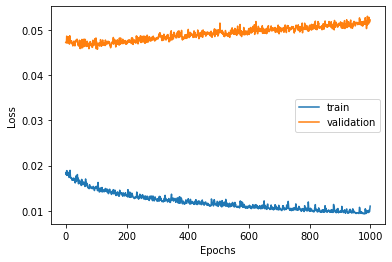

In [53]:
plt.plot(sol.history["loss"])
plt.plot(sol.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
#plt.xlim([20,40])
#plt.ylim([0,0.002])
plt.show()

In [57]:
model.predict(X_val[21].reshape(1,16384))

array([[0.30058357, 0.6525146 , 0.33311266, 0.7861053 , 0.67795926,
        0.7376952 , 0.40284246]], dtype=float32)

In [58]:
Y_val[21]

array([0.0725    , 0.55285714, 0.72222222, 0.88888889, 0.7       ,
       0.65      , 0.4       ])

In [59]:
model.save("ann-v2-1000epochs")